# Binary Classification Project with Breast Cancer Dataset
see -> https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset

Install kaggle \\
https://www.analyticsvidhya.com/blog/2021/06/how-to-load-kaggle-datasets-directly-into-google-colab/

In [76]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘/root/.kaggle’: File exists


Download dataset

In [77]:
! kaggle datasets download yasserh/breast-cancer-dataset
! unzip breast-cancer-dataset.zip

breast-cancer-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  breast-cancer-dataset.zip
replace breast-cancer.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: breast-cancer.csv       


Import necessary libraries

In [78]:
import pandas as pd
import numpy as np

# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf
from tensorflow.keras import layers

Reading dataset

In [79]:
dataset = pd.read_csv(
    "breast-cancer.csv")
print("dataset.shape", dataset.shape)
dataset.head()

dataset.shape (569, 32)


id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

Preparing the Dataset \\
[Categorical encoding using Label-Encoding and One-Hot-Encoder](https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd) \\
[Converting string categories or labels to numeric values in Pandas](https://www.skytowner.com/explore/converting_string_categories_or_labels_to_numeric_values_in_pandas)

In [80]:
# converting type of columns to 'category'
dataset['diagnosis'] = dataset['diagnosis'].astype('category')
# Assigning numerical values and storing in another column
dataset['diagnosis_label'] = dataset['diagnosis'].cat.codes
dataset

'''
Shorter way
# dataset['diagnosis_label'] = pd.Categorical(dataset['diagnosis']).codes
'''

"\nShorter way\n# dataset['diagnosis_label'] = pd.Categorical(dataset['diagnosis']).codes\n"

In [81]:
dataset.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'diagnosis_label'],
      dtype='object')

In [82]:
dataset = dataset.drop(columns=['id', 'diagnosis', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'])

In [83]:
dataset.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'diagnosis_label'],
      dtype='object')

Feature scaling \\
[How to make Feature Scaling with pandas DataFrames](https://www.learnpythonwithrune.org/how-to-make-feature-scaling-with-pandas-dataframes/#:~:text=Feature%20Scaling%20transforms%20values%20in,features%20spanning%20in%20different%20magnitudes.)

In [84]:
# Min-Max Normalization
dataset_temp = dataset.drop('diagnosis_label', axis=1)
dataset_norm = (dataset_temp-dataset_temp.min())/(dataset_temp.max()-dataset_temp.min())
dataset_norm = pd.concat((dataset_norm, dataset.diagnosis_label), 1)
 
print("Scaled Dataset Using Pandas")
dataset_norm.head()
dataset = dataset_norm

Scaled Dataset Using Pandas


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  after removing the cwd from sys.path.


Create trainSet and testSet

In [94]:
# creating trainSet
trainSet = dataset.iloc[169:,:]
print("trainSet.shape", trainSet.shape) 

# creating testSet
testSet = dataset.iloc[:169,:]
print("testSet.shape", testSet.shape) 

# data-label seperation
train_x = pd.DataFrame(trainSet, columns=['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'])
train_y = pd.DataFrame(trainSet, columns=['diagnosis_label'])
print("train_x.shape", train_x.shape) 
print("train_y.shape", train_y.shape) 

test_x = pd.DataFrame(testSet, columns=['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'])
test_y = pd.DataFrame(testSet, columns=['diagnosis_label'])
print("test_x.shape", test_x.shape) 
print("test_y.shape", test_y.shape) 

trainSet.shape (400, 11)
testSet.shape (169, 11)
train_x.shape (400, 10)
train_y.shape (400, 1)
test_x.shape (169, 10)
test_y.shape (169, 1)


Validation Set

In [95]:
train_x =  train_x.iloc[100:,:]
train_y = train_y.iloc[100:,:]
print("train_x.shape", train_x.shape) 
print("train_y.shape", train_y.shape)

validation_x =  train_x.iloc[:100,:]
validation_y = train_y.iloc[:100,:]
print("validation_x.shape", validation_x.shape) 
print("validation_y.shape", validation_y.shape)

train_x.shape (300, 10)
train_y.shape (300, 1)
validation_x.shape (100, 10)
validation_y.shape (100, 1)


Building network

In [97]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [98]:
history = model.fit(train_x, train_y, epochs=20, batch_size=512, validation_data=(validation_x, validation_y))

Epoch 1/20
1/1 [==============================] - 1s 1s/step - loss: 0.6967 - accuracy: 0.2767 - val_loss: 0.6854 - val_accuracy: 0.3600
Epoch 2/20
1/1 [==============================] - 0s 38ms/step - loss: 0.6886 - accuracy: 0.3833 - val_loss: 0.6808 - val_accuracy: 0.4100
Epoch 3/20
1/1 [==============================] - 0s 41ms/step - loss: 0.6833 - accuracy: 0.4467 - val_loss: 0.6768 - val_accuracy: 0.4900
Epoch 4/20
1/1 [==============================] - 0s 38ms/step - loss: 0.6789 - accuracy: 0.5067 - val_loss: 0.6732 - val_accuracy: 0.5400
Epoch 5/20
1/1 [==============================] - 0s 33ms/step - loss: 0.6749 - accuracy: 0.5400 - val_loss: 0.6696 - val_accuracy: 0.5700
Epoch 6/20
1/1 [==============================] - 0s 41ms/step - loss: 0.6711 - accuracy: 0.5733 - val_loss: 0.6661 - val_accuracy: 0.6100
Epoch 7/20
1/1 [==============================] - 0s 42ms/step - loss: 0.6675 - accuracy: 0.6133 - val_loss: 0.6627 - val_accuracy: 0.7000
Epoch 8/20
1/1 [=============

In [100]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

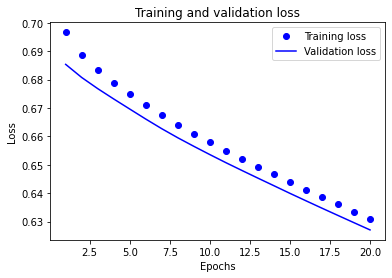

In [107]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

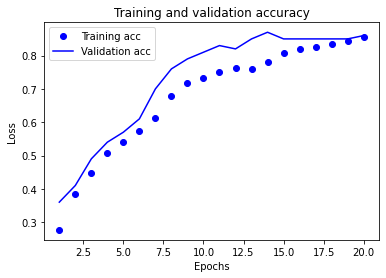

In [109]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [110]:
results = model.evaluate(test_x, test_y)

6/6 [==============================] - 0s 5ms/step - loss: 0.6597 - accuracy: 0.7101
